In [51]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [7]:
dataframe_names = [
    'user_friends',
    'user_taggedartists',
    'user_taggedartists_timestamps',
    'artists',
    'tags',
    'user_artists']

file_names = [
    'data/user_friends.dat',
    'data/user_taggedartists.dat',
    'data/user_taggedartists-timestamps.dat',
    'data/artists.dat',
    'data/tags.dat',
    'data/user_artists.dat']

In [8]:
for (dataframe, file) in zip(dataframe_names, file_names):
    if dataframe == 'tags':
        vars()[dataframe] = pd.read_table(file, sep="\t", encoding = "latin-1")
    else:
        vars()[dataframe] = pd.read_table(file, sep="\t")

# Exploring the Users' Friends Dataset

In [165]:
users_friends_count = (
    user_friends
    .groupby('userID', as_index=False)
    .agg({'friendID': ['count']})
)

In [166]:
users_friends_count.columns = ['userID', 'count_friends']

In [167]:
mean = str(users_friends_count['count_friends'].mean())
min = str(users_friends_count['count_friends'].min())
max = str(users_friends_count['count_friends'].max())

print('The average number of friends each user has is ' + mean + ' friends')
print('The user with the least amount of friends has ' + min + ' friends')
print('The user with the most amount of friends has ' + max + ' friends')

The average number of friends each user has is 13.44291754756871 friends
The user with the least amount of friends has 1 friends
The user with the most amount of friends has 119 friends


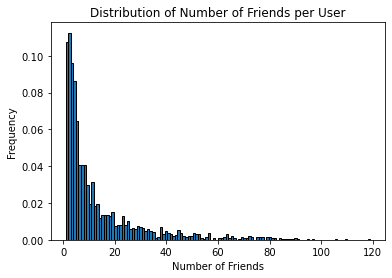

In [172]:
data = users_friends_count['count_friends']
plt.hist(data, weights=np.ones(len(data)) / len(data), bins=120, edgecolor='black')
plt.gca().set(
    title='Distribution of Number of Friends per User', 
    xlabel='Number of Friends',
    ylabel='Frequency'
);

As you can see in the above chart, over 60% of the users in this dataset have between 0 and 10 friends. Only ~15% of users have between 10 and 20 friends. 

We can also conclude that only less than 25% of users have over 20 friends. This is useful to know, as this would imply that a recommender system based off a user's friends' favourite artists alone may not perform accurately.

Although using friends' liked artists as a sole method to recommend songs, it might be useful to put a slightly larger weight on their friends' artists, as long as they have a similar taste in music.

# Exploring Users' Tagged Artists

In [140]:
tagged_artists_users = (
    user_taggedartists
    .groupby('artistID', as_index=False)
    .agg({'userID': ['count']})
)

tagged_artists_users = (
    user_taggedartists
    .groupby('artistID', as_index=False)
    .agg({'userID': lambda x: x.nunique()})
)

In [141]:
tagged_artists_users.columns = ['artistID', 'count_users']

0    1
dtype: int64

In [149]:
mean = str(tagged_artists_users['count_users'].mean())
min = str(tagged_artists_users['count_users'].min())
max = str(tagged_artists_users['count_users'].max())

print('The average artist has been assigned a tag from ' + mean + ' users')
print('The user with the least amount of of users assigning tags has ' + min + ' user(s)')
print('The user with the most amount users assigning tags has ' + max + ' users')

The average artist has been assigned a tag from 5.674678591391839 users
The user with the least amount of of users assigning tags has 1 user(s)
The user with the most amount users assigning tags has 206 users


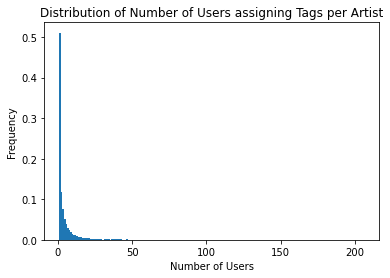

In [163]:
data = tagged_artists_users['count_users']
plt.hist(data, weights=np.ones(len(data)) / len(data), bins=200)
plt.gca().set(
    title='Distribution of Number of Users assigning Tags per Artist', 
    xlabel='Number of Users',
    ylabel='Frequency'
);

The plot above shows that there are very few artists that have over 50 users assigning tags.

In [173]:
tagged_artists_users[tagged_artists_users['count_users']>=50].count()

artistID       146
count_users    146
dtype: int64

There are 55 artists who have been assigned tags from over 50 users. This suggests that there isn't a mistaken outlier, and that the data is just very sparse (just over 1%) after reaching 50 users.

In [137]:
tagged_artists_tags.columns = ['artistID', 'count_tags']

In [139]:
mean = str(tagged_artists_tags['count_tags'].mean())
min = str(tagged_artists_tags['count_tags'].min())
max = str(tagged_artists_tags['count_tags'].max())

print('The average artist has been assigned ' + mean + ' tags')
print('The user with the least amount of tags has ' + min + ' tag(s)')
print('The user with the most amount tags has ' + max + ' tags')

The average artist has been assigned 8.763874470973409 tags
The user with the least amount of tags has 1 tag(s)
The user with the most amount tags has 329 tags


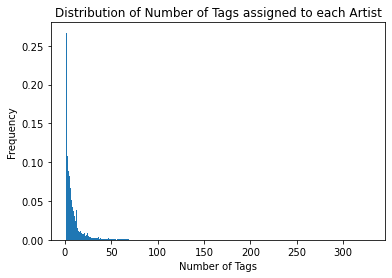

In [162]:
data = tagged_artists_tags['count_tags']
plt.hist(data, weights=np.ones(len(data)) / len(data), bins=300)
plt.gca().set(
    title='Distribution of Number of Tags assigned to each Artist', 
    xlabel='Number of Tags',
    ylabel='Frequency'
);

The above graph shows that over 25% of artists have received only 1 unique tag. 

The frequency of tags seems to be very close to 0 when the number of tags is greater than 75.

In [186]:
tagged_artists_tags[tagged_artists_tags['count_tags']<=5].count()

artistID      6846
count_tags    6846
dtype: int64

Only 81 (0.65%) of the artists have greater than 75 unique tags assigned to them. 

In fact, over half of the artists have been assigned between 1 and 5 unique tags.

These tags will allow for a more complex recommendation to be made to a user.

# Exploring the Artists Dataset